<a href="https://colab.research.google.com/github/TimoLloMac/deep-dive-data-science-projects/blob/main/Project_1_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1

- Timothy McKee - February 6, 2025

## Problem Definition

The goal for this project is to predict whether a customer will make a transaction or not, based on historical data. We know that our data contains yes-or-no information on whether past transactions were completed. We thus have a target represented in the data. We're predicting a binary categorical event: transaction or no transaction, meaning that this is a supervised classification problem. This will become evident as we review the data. We will be using Gaussian Naive Bayes to make our predictions.



## Data Collection

This data comes from a CSV file hosted in an AWS S3 bucket here: https://ddc-datascience.s3.amazonaws.com/



###Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

### Load Data

In [3]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_path = base_path + 'Transaction.train.csv'
test_path = base_path + 'Transaction.test.csv'

In [4]:
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

In [5]:
test_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.test.csv'

With the file path in place we can now load the data from CSV into a Pandas DataFrame. We'll look at the first few rows to confirm that it has loaded properly and have an initial glance.

In [7]:
train_orig = pd.read_csv(train_path)
train_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


## Metadata Overview

In [ ]:
train_orig.shape

(180000, 53)

We see that the data set has 53 rows and 180,000 columns.

Let's look at some more information.

In [ ]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [ ]:
train_orig.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,180000.0,NaN,NaN,NaN,89999.5,51961.668564,0.0,44999.75,89999.5,134999.25,179999.0
ID_code,180000,180000,train_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,180000.0,NaN,NaN,NaN,0.100222,0.300297,0.0,0.0,0.0,0.0,1.0
var_0,180000.0,NaN,NaN,NaN,10.67865,3.041036,0.4084,8.451675,10.52675,12.7562,20.315
var_1,180000.0,NaN,NaN,NaN,-1.630045,4.050519,-15.0434,-4.7456,-1.61125,1.360225,10.3768
var_2,180000.0,NaN,NaN,NaN,10.712922,2.639146,2.1171,8.72,10.5796,12.5141,19.353
var_3,180000.0,NaN,NaN,NaN,5.408688,0.866265,2.3473,4.7685,5.3856,6.0032,8.4477
var_4,180000.0,NaN,NaN,NaN,7.566953,1.235043,3.9705,6.6188,7.6285,8.5838,11.1506
var_5,180000.0,NaN,NaN,NaN,14.024017,0.190038,13.4346,13.8939,14.0255,14.1644,14.6545
var_6,180000.0,NaN,NaN,NaN,8.52808,4.6417,-6.0111,5.06575,8.5992,12.2733,22.3315


 it's a bit hard to read with so many columns, but it appears that we have 50 numerical variables. They are anonymized with no additional information about what variables they are.

 Let's check just column names and then isolate data types.

In [ ]:
train_orig.columns

Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17',
       'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24',
       'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38',
       'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45',
       'var_46', 'var_47', 'var_48', 'var_49'],
      dtype='object')

In [ ]:
# Check data types of each column
train_orig.dtypes

,0
Unnamed: 0,int64
ID_code,object
target,int64
var_0,float64
var_1,float64
var_2,float64
var_3,float64
var_4,float64
var_5,float64
var_6,float64


In [ ]:
train_orig.dtypes.value_counts()

,count
float64,50
int64,2
object,1


##Data Cleaning

###Null Values

It also looked like there were no no values anywhere. We can confirm this more concisely.

In [ ]:
train_orig.isnull().sum().sum()

0

###Drop columns

Making a copy of the original set.

In [ ]:
train = train_orig.copy()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


The first two columns are both just sequential lists of identifiers. This is not useful data, so they should be dropped.

In [ ]:
train.iloc[:6, :2]

,Unnamed: 0,ID_code
0,0,train_0
1,1,train_1
2,2,train_2
3,3,train_3
4,4,train_4
5,5,train_5


In [ ]:
train.drop( columns = ['Unnamed: 0', 'ID_code'], inplace = True)

In [ ]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


###Check Target Values

Our target column should only have two possible values: 1 for a completed transaction and 0 for no completed transaction.



In [ ]:
target_counts = train['target'].value_counts()
target_counts

,count
target,
0,161960
1,18040


Note: there is a definite skew toward zero, representing no transaction.

I'll create copies that should be useful later: one containing just the target column in one containing the predictors.

In [ ]:
predictor_df = train.drop(columns=['target']).copy()
target_df = train[['target']].copy()

print(target_df.head(), "\n \n", (predictor_df.head()))



   target
0       0
1       0
2       0
3       0
4       0 
 
      var_0   var_1    var_2   var_3   var_4    var_5    var_6    var_7  \
0   8.9255 -6.7863  11.9081  5.1187  5.7470  14.0137   0.5745   4.2840   
1  11.5006 -4.1473  13.8588  5.6208  8.0851  14.0239   8.4135   7.8000   
2   8.6093 -2.7457  12.0805  6.9427  5.9525  14.1929   7.3124   4.7011   
3  11.0604 -2.1518   8.9522  5.8428  8.2450  13.8463  11.9704  15.9426   
4   9.8369 -1.4834  12.8746  5.9405  7.6784  13.8481   7.8895   6.5263   

     var_8    var_9  ...  var_40  var_41   var_42   var_43   var_44   var_45  \
0  16.2191   2.5791  ...  5.4879 -4.7645   3.1531  18.5618   1.7202  25.8398   
1   2.7407   8.5524  ...  5.7999  5.5378   5.5134  30.2645  11.0752  22.5441   
2  18.1377   1.2145  ...  5.7690 -7.0927  -5.8234  25.6820   2.4013  23.0866   
3  12.5579   6.8202  ...  5.3430 -7.1541  11.7134  14.7483   5.6961  -0.4639   
4  18.9608  10.1102  ...  5.5518  1.4493   2.3705  18.4685   5.1743  11.8503   

   var_46 

## Exploratory Data Analysis

###Distribution

We have continuous numerical data in the features. To know whether a Naive Bayes model will work, we need to see if the data is normally distrbuted.

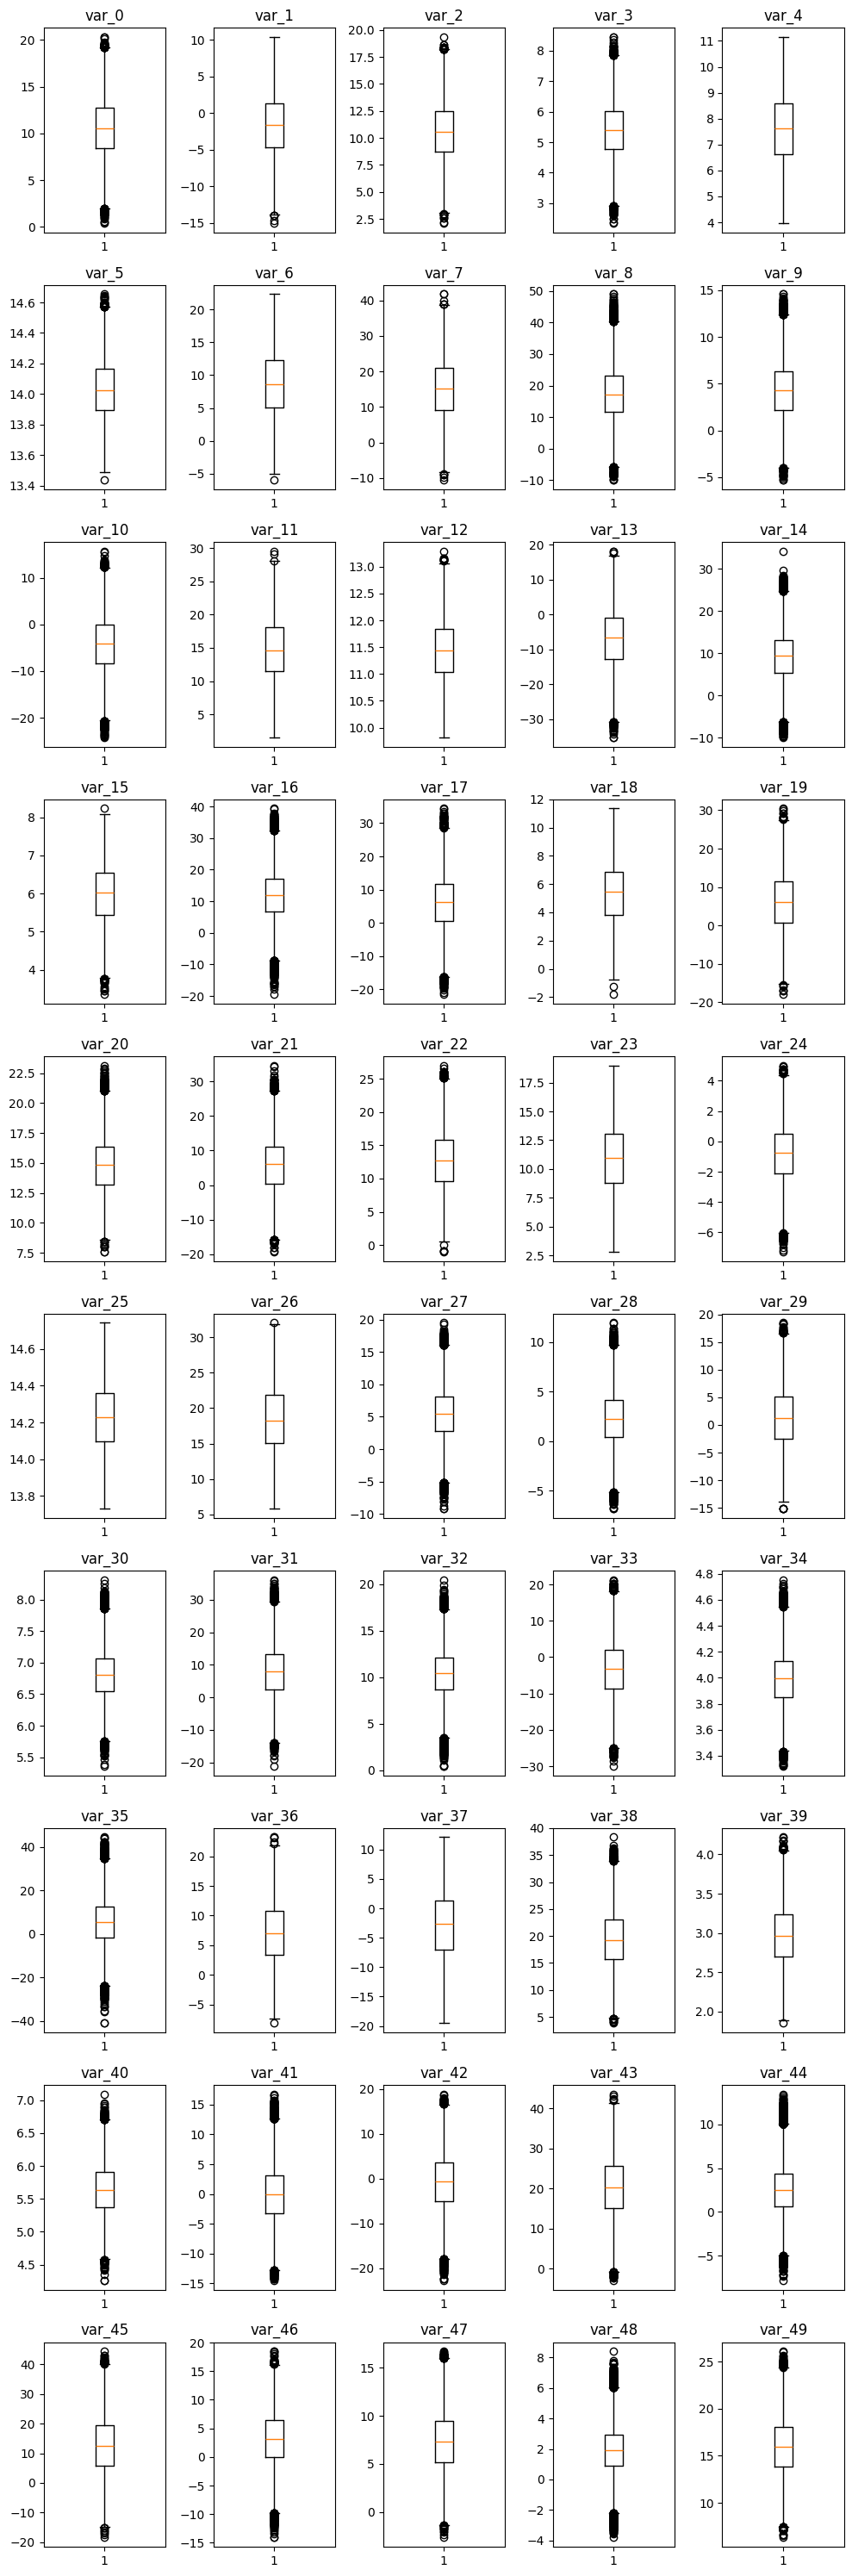

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10, 30))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# counter for subplots
subplot_index = 0

for column in train.columns:
    if column.startswith('var_'): #skipping the 'target' column
        axes[subplot_index].boxplot(train[column])
        axes[subplot_index].set_title(f"{column}")

        subplot_index += 1

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()
plt.savefig('box_grid.png')

There doesn't appear to be any notable skew in the box plots above.

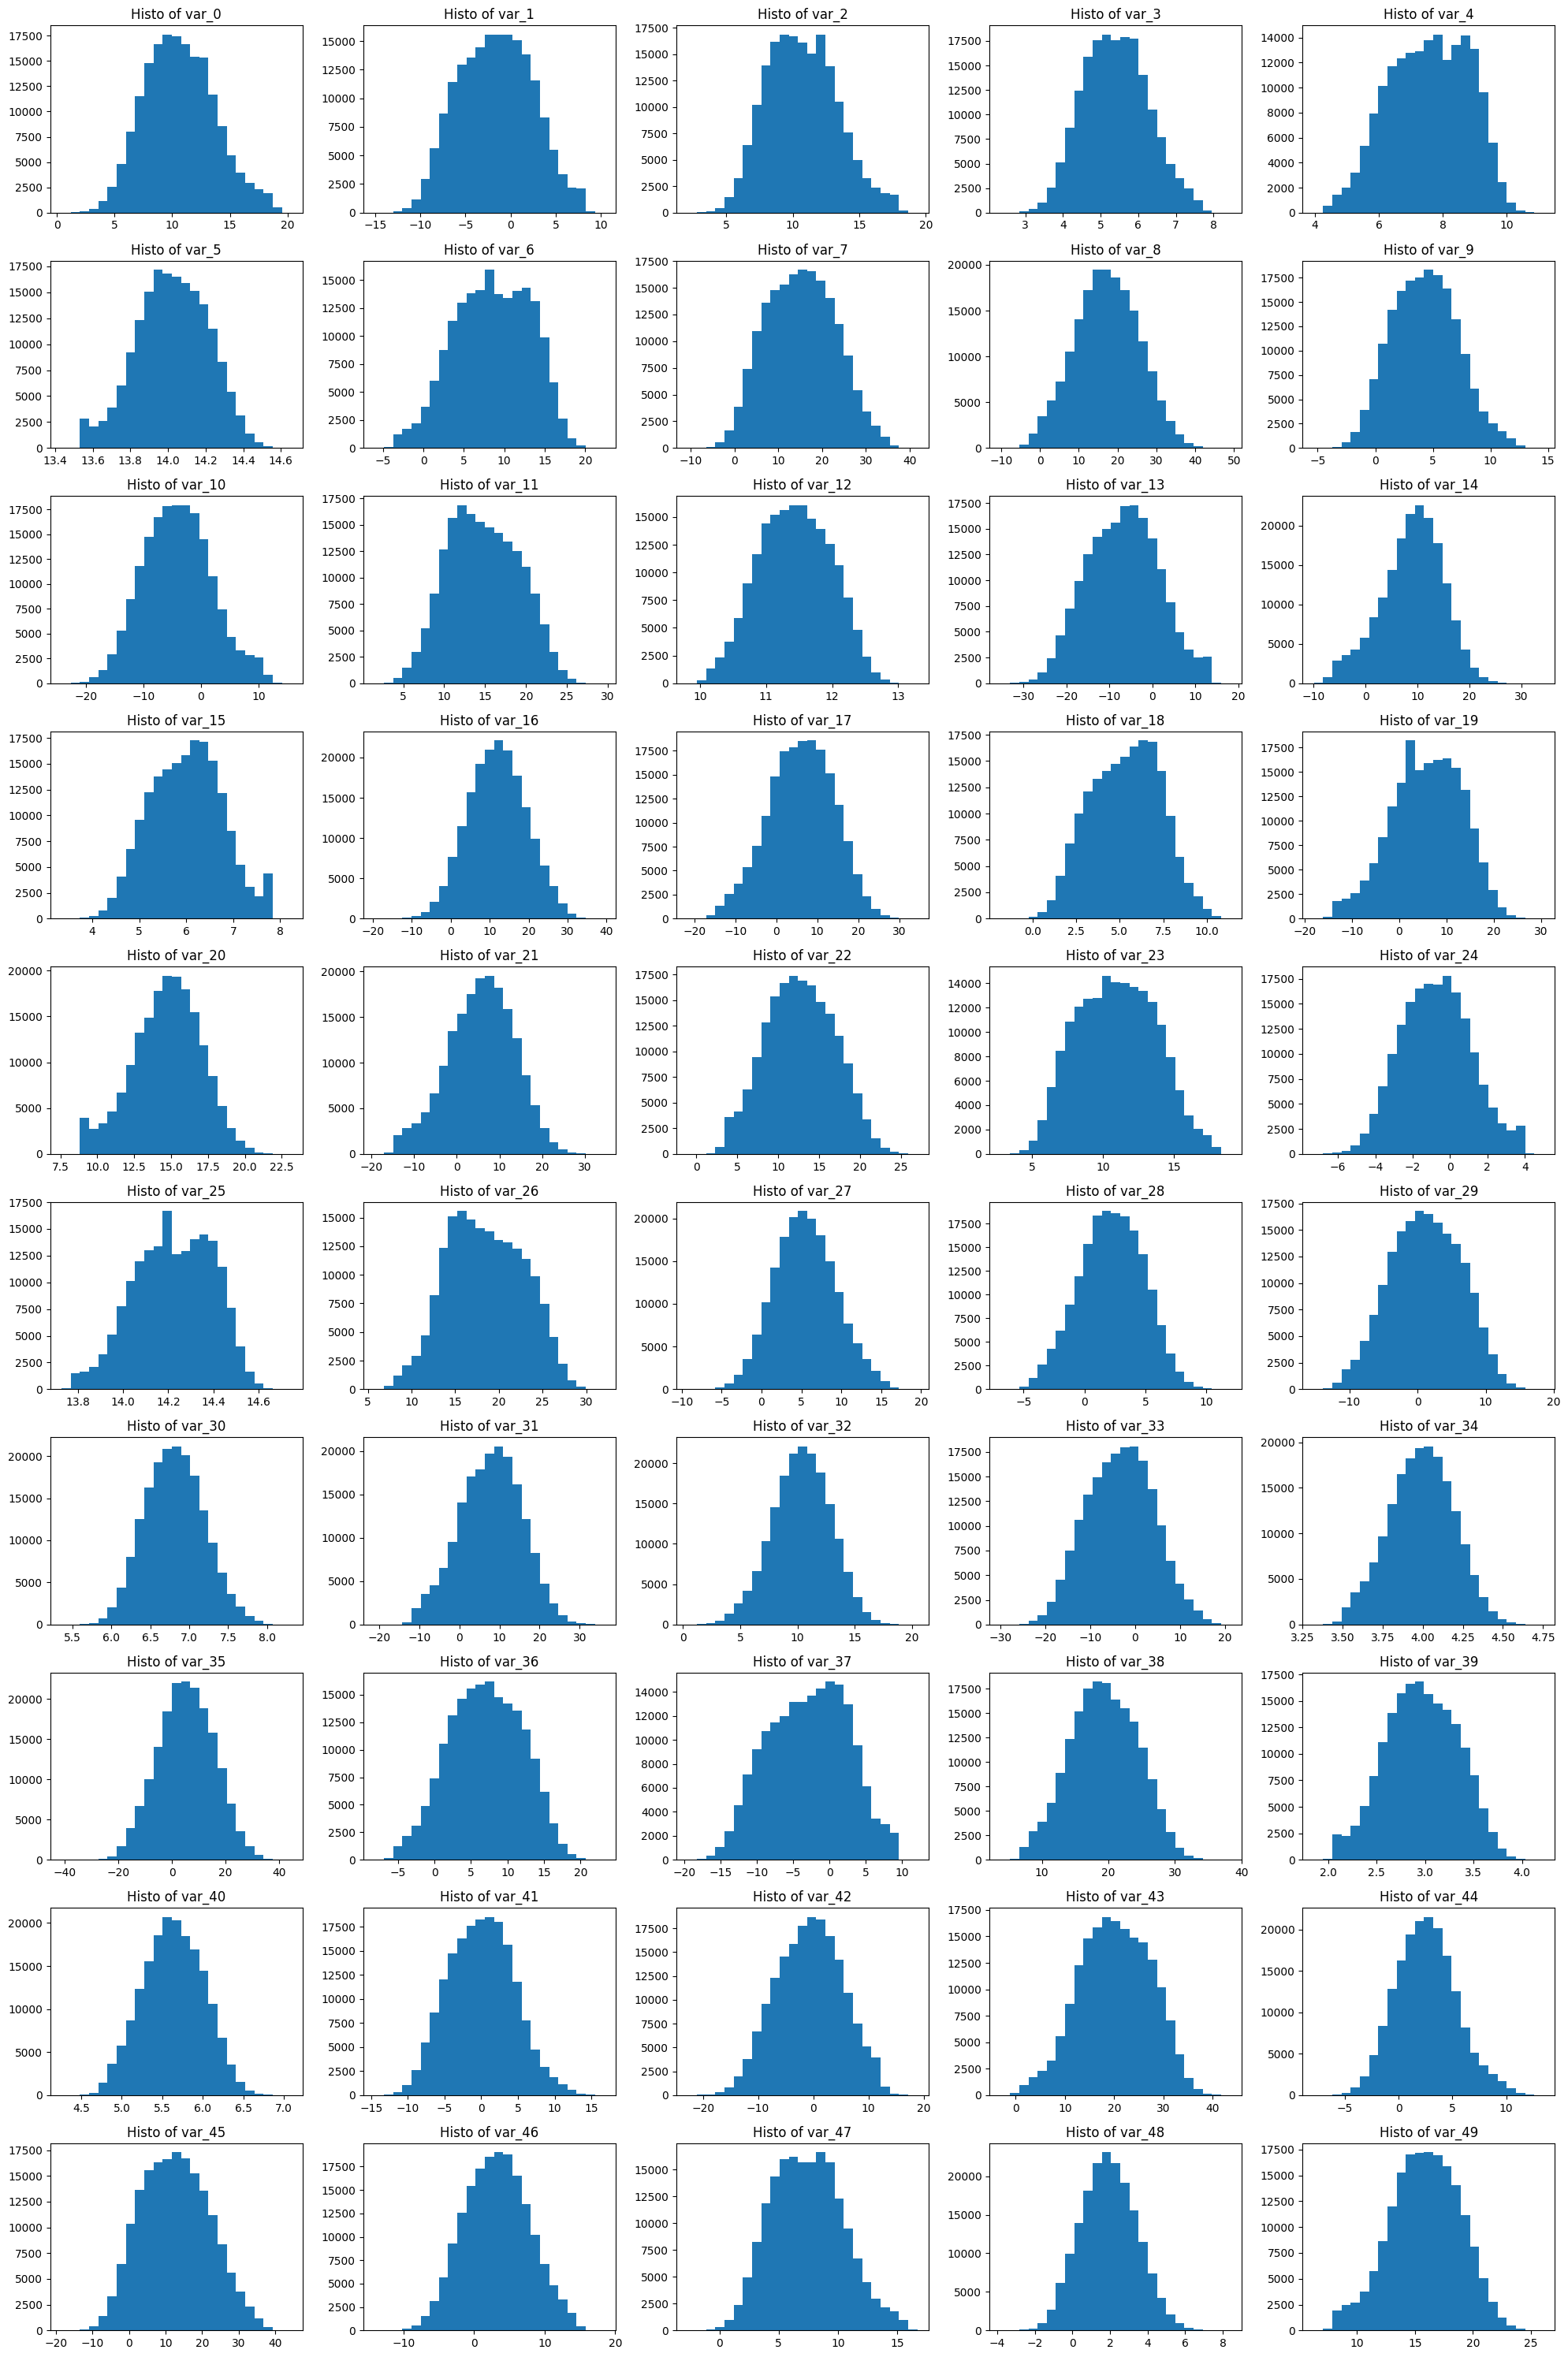

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 30))

axes = axes.flatten()

subplot_index = 0

for column in train.columns:
    if column.startswith('var_'):
        axes[subplot_index].hist(train[column], bins = 25) # Histogram this time
        axes[subplot_index].set_title(f"Histo of {column}")

        subplot_index += 1

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

subplot_index = 0

for column in train.columns:
    if column.startswith('var_'):
        axes[subplot_index].hist(train[column], bins = 25) # Histogram this time
        axes[subplot_index].set_title(f"Histo of {column}")

        subplot_index += 1

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()
plt.savefig('hist_grid.png')

 Some of these histograms are not a perfect bell curve, but I don't see anything that would indicate two or more distinct populations.

 This looks like normal distribution, which Naive Bayes assumes, so this looks to be a good model match.

###Correlation

Naive Bayes assumes that features are not substantially correlated with each other.

In [ ]:
predictor_columns = train.drop('target', axis=1).columns
predictor_columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35',
       'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42',
       'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49'],
      dtype='object')

In [ ]:
correlation_matrix = train[predictor_columns].corr()
correlation_matrix.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
var_0,1.000000,-0.002155,0.006632,0.007155,-0.002247,-0.003147,-0.001717,0.004266,0.000289,0.002817,...,-0.002602,0.002043,0.001072,-0.001493,0.003662,-0.000227,0.002330,-0.000037,-0.005759,-0.005945
var_1,-0.002155,1.000000,0.005644,0.002640,-0.000408,-0.002629,-0.001234,-0.000374,-0.000378,0.001282,...,-0.003109,0.001891,0.003331,-0.005291,0.000805,0.000387,0.005835,0.003845,-0.003810,-0.005352
var_2,0.006632,0.005644,1.000000,0.000679,-0.001293,-0.002718,-0.009171,0.003436,-0.006433,0.000511,...,-0.004639,0.002059,0.000459,-0.005709,0.001388,0.004021,-0.000657,0.000968,-0.002388,-0.000372
var_3,0.007155,0.002640,0.000679,1.000000,-0.006768,-0.002568,-0.005282,0.002685,-0.004835,0.002293,...,-0.004825,0.002188,-0.000344,-0.005121,-0.000999,0.003463,0.000276,0.005311,-0.001109,-0.002987
var_4,-0.002247,-0.000408,-0.001293,-0.006768,1.000000,0.000845,0.000210,-0.001267,0.000962,-0.005332,...,-0.000824,-0.000685,-0.004266,0.000483,-0.003563,-0.004458,0.000043,-0.000716,0.000190,0.001484


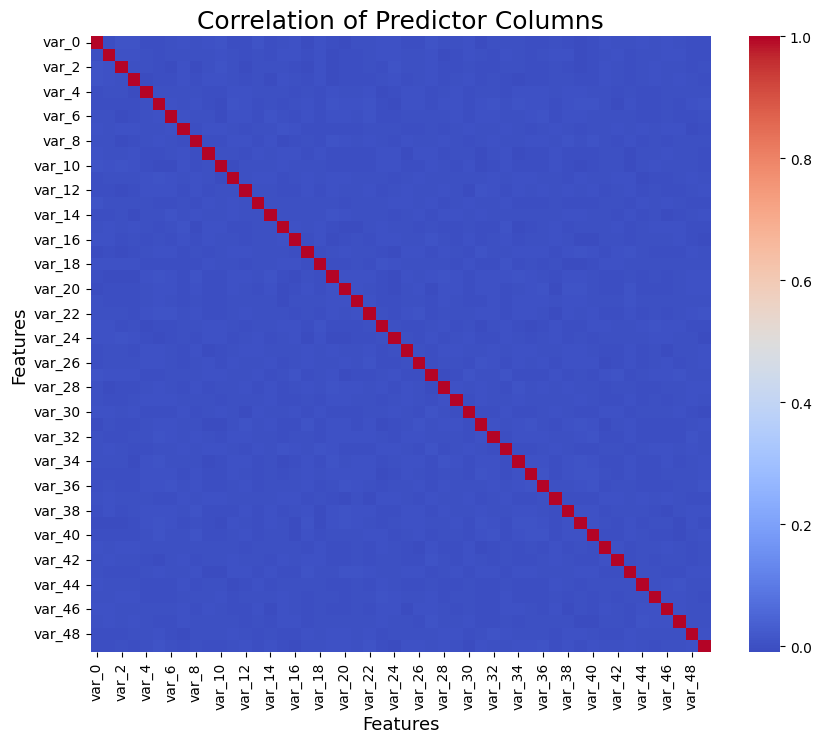

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') #Remove annotation due to size of plot
plt.title('Correlation of Predictor Columns', size = 18)
plt.xlabel("Features", size=13)
plt.ylabel("Features", size=13)
plt.show()
plt.savefig('corr.png')

Aside from each features self correlation of 1.0, there appears to be very little correlation between any.

Let's check on what the highest non-self correlation is.

In [ ]:
# Create mask for a self-correlated value of one
mask = correlation_matrix == 1
less_self_corr = correlation_matrix.mask(mask)
less_self_corr.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
var_0,NaN,-0.002155,0.006632,0.007155,-0.002247,-0.003147,-0.001717,0.004266,0.000289,0.002817,...,-0.002602,0.002043,0.001072,-0.001493,0.003662,-0.000227,0.002330,-0.000037,-0.005759,-0.005945
var_1,-0.002155,NaN,0.005644,0.002640,-0.000408,-0.002629,-0.001234,-0.000374,-0.000378,0.001282,...,-0.003109,0.001891,0.003331,-0.005291,0.000805,0.000387,0.005835,0.003845,-0.003810,-0.005352
var_2,0.006632,0.005644,NaN,0.000679,-0.001293,-0.002718,-0.009171,0.003436,-0.006433,0.000511,...,-0.004639,0.002059,0.000459,-0.005709,0.001388,0.004021,-0.000657,0.000968,-0.002388,-0.000372
var_3,0.007155,0.002640,0.000679,NaN,-0.006768,-0.002568,-0.005282,0.002685,-0.004835,0.002293,...,-0.004825,0.002188,-0.000344,-0.005121,-0.000999,0.003463,0.000276,0.005311,-0.001109,-0.002987
var_4,-0.002247,-0.000408,-0.001293,-0.006768,NaN,0.000845,0.000210,-0.001267,0.000962,-0.005332,...,-0.000824,-0.000685,-0.004266,0.000483,-0.003563,-0.004458,0.000043,-0.000716,0.000190,0.001484


In [ ]:
# Find the maximum in the data frame, excluding the new null values
less_self_corr.max().max()

0.009728198976560862

This is not a substantial correlation.

## Data Processing

### Gaussian Naive Bayes Model


Create the GNB model.

In [ ]:
gnb = GaussianNB()

Separate features from target.

In [ ]:
y = train['target'].copy()
X = train.drop('target', axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # train/test split
gnb.fit(X_train, y_train) # fit the model
y_pred = gnb.predict(X_test) # predict using model
points = X_test.shape[0] # size of test group
errors = (y_test != y_pred).sum() # count errors (discrepancy between prediction and test data)
print(f"Number of mislabeled points out of a total {points} points : {errors}")
print(f"Accuracy: {(1-(errors/points))*100:.1f}%")

Number of mislabeled points out of a total 36000 points : 3283
Accuracy: 90.9%


###Cross-Validation

We've seen the results of a single trial, so now we'll look at the average over a series of runs with our model.

In [ ]:
#Create a cross-validation function
def cross_validate(X, y, num_loops):
  """
  Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops): #set up loop
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #train/test split
    model_split_cv = GaussianNB() #create the model
    model_split_cv.fit(X_train, y_train) #fit the model
    y_split_pred = model_split_cv.predict(X_test) # predict using model
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred) # count errors (discrepancy between prediction and test data)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100) #100 trials
print(f"Accuracy: {round(accuracy_scores.mean(), 5)*100}%")


Accuracy: 91.111%


 91.1% over 100 trials it's quite close to 90.9% from one.

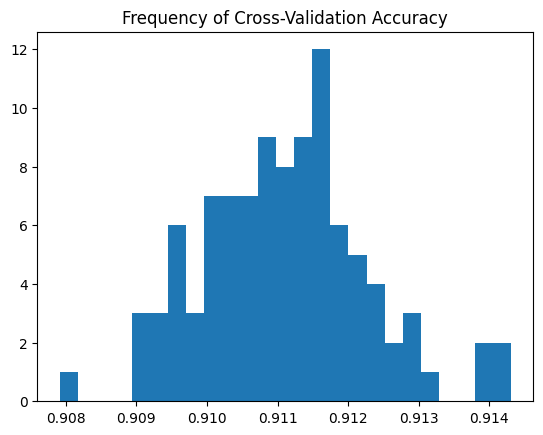

In [ ]:
plt.hist(accuracy_scores, bins = 25)
plt.title('Frequency of Cross-Validation Accuracy')
plt.show()

This histogram shows a range from just under 91% to about 91.5%.

Now we'll look at a confusion matrix for our model run.

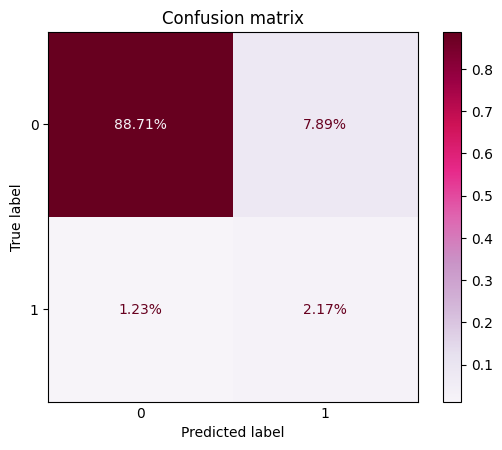

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
  y_true = y_pred,
  y_pred = y_test,
  normalize = 'all',
  values_format = '.2%',
  cmap = 'PuRd',)
plt.grid(False)
plt.tick_params(axis='x', which='both', length=0)
plt.title('Confusion matrix')
plt.savefig('confusion_matrix_1.png')

And a classifaction report:

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32378
           1       0.64      0.22      0.32      3622

    accuracy                           0.91     36000
   macro avg       0.78      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



We see from both of these that our model does well at predicting the absence of a transaction, toward which our data was heavily skewed. It doesn't do well with predicting a positive.

###Balancing Target Training Data

 Since there are so many more values of zero in our target data, we'll take a sample from the non-transaction set that's the same size as the positive transaction set.

In [ ]:
train_zeros = train[target_df['target'] == 0] # zeros from dataframe target_df created earlier with var_ data called
train_ones = train[target_df['target'] == 1] # ones from target_df
balanced = pd.concat([train_zeros.sample(18040), train_ones]) # concatenate equal-sized sample with ones
balanced.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
16425,0,14.3392,-4.3932,10.0600,6.1089,7.7525,13.7357,3.1129,25.6034,6.7864,...,5.5602,-0.6102,4.5946,28.2002,3.2162,16.0913,8.3433,9.7367,0.2668,16.2509
148550,0,7.9037,0.5588,5.9578,5.5450,8.6716,13.8590,12.1635,17.9768,15.6680,...,5.4991,-3.6313,-0.2879,23.2765,1.5386,13.7625,7.5559,7.0286,1.9083,12.4531
177578,0,10.8530,2.3887,8.9703,4.7795,7.9259,14.1206,7.7812,18.8940,13.9432,...,5.7238,5.7872,-7.0216,18.9765,8.2288,16.5901,4.5447,11.2196,0.0424,12.0420
154102,0,11.9622,2.0323,12.2037,5.4375,8.1212,14.0318,-0.3735,13.7887,26.8842,...,5.3562,0.6541,-7.5480,15.3872,-0.2706,20.5869,3.6231,7.9115,1.7582,14.9660
98062,0,7.2143,0.8957,8.2359,6.6940,8.1832,14.0106,5.5830,10.8425,22.4937,...,5.8714,-0.3234,3.5926,29.3731,-1.6452,3.3248,6.9086,4.6706,-0.7919,18.4456


Let's confirm that the groups are now equal in size:

In [ ]:
balanced_counts = balanced['target'].value_counts()
balanced_counts

,count
target,
0,18040
1,18040


We'll now run a cross-validation for this balanced DataFrame.

In [ ]:
#Separate features from target
y = balanced['target'].copy() #now from 'balanced' dataframe
X = balanced.drop('target', axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # train/test split
gnb.fit(X_train, y_train) # fit the model
y_pred = gnb.predict(X_test) # predict using model
points = X_test.shape[0] # size of test group
errors = (y_test != y_pred).sum() # count errors (discrepancy between prediction and test data)
print(f"Number of mislabeled points out of a total {points} points : {errors}")
print(f"Accuracy: {(1-(errors/points))*100:.1f}%")

Number of mislabeled points out of a total 7216 points : 1778
Accuracy: 75.4%


A confusion matrix for our model run may show us something.

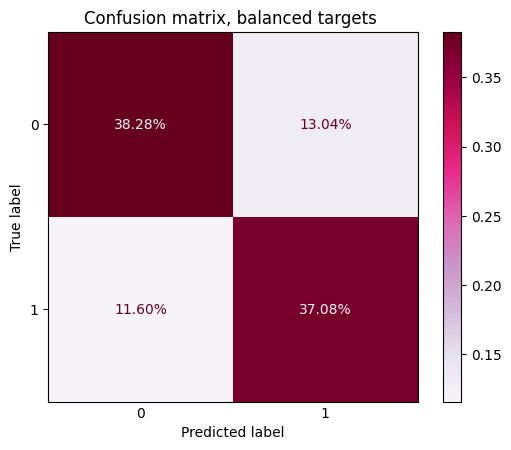

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
  y_true = y_pred,
  y_pred = y_test,
  normalize = 'all',
  values_format = '.2%',
  cmap = 'PuRd',)
plt.grid(False)
plt.tick_params(axis='x', which='both', length=0)
plt.title('Confusion matrix, balanced targets ')
plt.savefig('confusion_matrix_balanced_targets.png')

The accuracy of predicting successful and unsuccessful transactions has now evened out.

A classifaction report should show something similar:

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3599
           1       0.76      0.74      0.75      3617

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



We can also run the function again to cross-validate.

In [ ]:
accuracy_scores = cross_validate(X, y, 100) #100 trials
print(f"Accuracy: {round(accuracy_scores.mean(), 5)*100}%")


Accuracy: 75.52799999999999%


75.553% over 100 trials is close to what we just saw from a single trial. The likelihood of predicting a successful transaction is now much higher and basically equivalent to predicting an unsuccessful transaction.

##Conclusion

### Model performance

- Using all the available numerical data with our Naive Bayes model gave a only a 64% precision and 22% recall for predicting successful transactions in our cross-validation tests, despite a high overall accuracy.
- The entire original data set was so skewed as not to be helpful for a Naive Bayes prediction model.
- Calling the training set significantly to leave us with equal numbers of successful and unsuccessful transactions resulted in a balanced prediction model with roughly 75% across precision, recall, F1 and overall accuracy for both types of transaction result.

### Future exploration/ Next steps

- Much of the data is very similar. It's possible that working with a much smaller subgroup, rather than aiming to include as much as possible, would give us basically the same results. Computation time didn't seem extensive while working on this project, but regenerating figures to account for changes in code does add up over time. And it would be interesting to know as context to inform later projects.